
<h1 id="FTPL COVID-19 Analysis">FTPL COVID-19 Analysis<a class="anchor-link" href="#FTPL-COVID-19-Analysis">¶</a></h1><p>We will apply the Follow the Perturbed Leader algorithm to select the best hyperparameter for a number of different strategies (Mean Reversion, Momentum, Autoregressor) on JETS data during the COVID-19 pandemic.</p>



<h2 id="Imports">Imports<a class="anchor-link" href="#Imports">¶</a></h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils.utils as utils
import strategies.strategies as strategies
%matplotlib inline


<h2 id="Load-Data">Load Data<a class="anchor-link" href="#Load-Data">¶</a></h2>


In [2]:
fname = 'csv_data/clean_data/jets_dailys_clean.csv'
returns = utils.load_data(fname)
arima_fname = 'csv_data/clean_data/jets_daily_15-19_clean.csv'
arima_data = pd.read_csv(arima_fname, index_col=0, squeeze=True)['return']
stock_name = "JETS"

<h2 id="Model Setup">Model Setup<a class="anchor-link" href="#Model-Setup">¶</a></h2>

In [3]:
experiments = {} # maps strat-> name of strategy model->list of models, ftpl-> ftpl class

# mean reversion
models_mr = []

for i in range(10, 35, 4):
    mr_model = strategies.MeanReversion(k=i)
    models_mr.append(mr_model)

ftpl_mr = strategies.FTPL()

experiments['Mean Reversion'] = {'models': models_mr, 'ftpl': ftpl_mr}


# momentum
models_mtm = []

for i in range(14, 34, 4):
    mtm_model = strategies.Momentum(k=i)
    models_mtm.append(mtm_model)
ftpl_mtm = strategies.FTPL()

experiments['Momentum'] = {'models': models_mtm, 'ftpl': ftpl_mtm}

# autoregressive model (we want to test an AR model with 1,2,3 lag and 1 time difference)
models_ar = []

for i in range(1, 10):
    ar_model = strategies.ARIMA(arima_data, i, 1, 0)
    models_ar.append(ar_model)
ftpl_ar = strategies.FTPL()

experiments['ARIMA'] = {'models':models_ar, 'ftpl':ftpl_ar}

<h2 id="FTPL Algorithm">FTPL Algorithm<a class="anchor-link" href="#FTPL-Algorithm">¶</a></h2>

In [4]:
# run the algorithm for all of the models
for strategy, val in experiments.items():
    print(f"Running model for {strategy} strategy")
    models = val['models']
    ftpl = val['ftpl']
    ftpl.run_algorithm(returns, models)

Running model for Mean Reversion strategy
Running model for Momentum strategy
Running model for ARIMA strategy



<h2 id="Data Visualization">Data Visualization<a class="anchor-link" href="#Data-Visualization">¶</a></h2>


### Mean Reversion Visualization

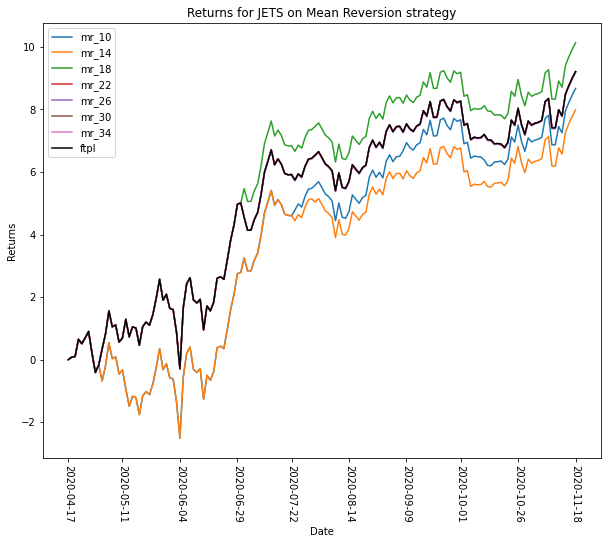

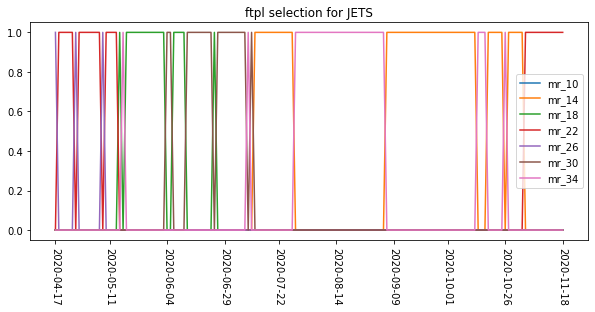

In [5]:
utils.visualize(experiments, 'Mean Reversion', stock_name, True)

### Momentum Visualization 

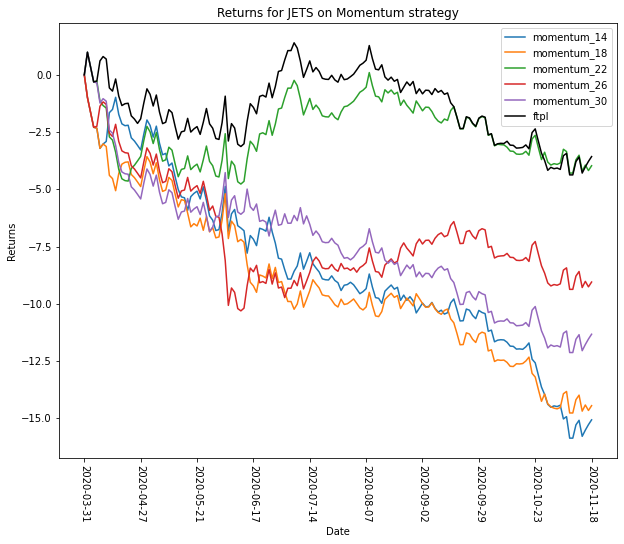

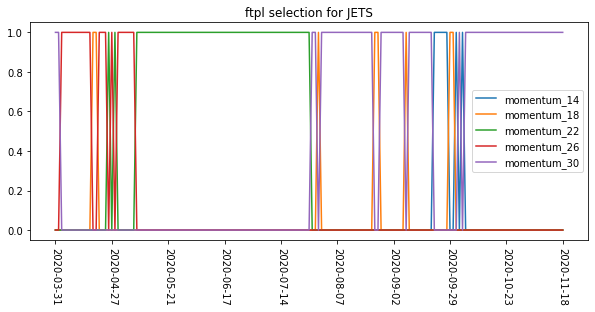

In [6]:
utils.visualize(experiments, 'Momentum', stock_name, True)

### ARIMA Visualization

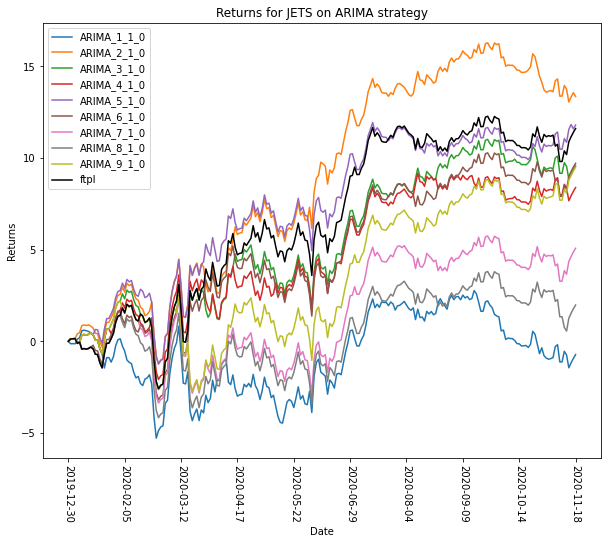

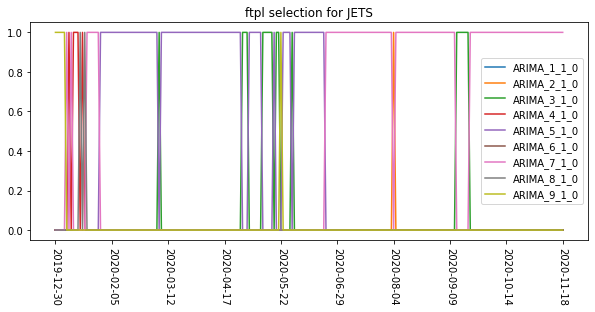

In [7]:
utils.visualize(experiments, 'ARIMA', stock_name, True)